# 5 Miyazaki 2018 reward
reproduce results of the theses 

In [1]:
from IPython.display import HTML

HTML("""
<button id="code-show-switch-btn">スクリプトを非表示にする</button>

<script>
var code_show = true;

function switch_display_setting() {
    var switch_btn = $("#code-show-switch-btn");
    if (code_show) {
        $("div.input").hide();
        code_show = false;
        switch_btn.text("スクリプトを表示する");
    }else {
        $("div.input").show();
        code_show = true;
        switch_btn.text("スクリプトを非表示にする");
    }
}

$("#code-show-switch-btn").click(switch_display_setting);
</script>
""")

In [7]:
# please import twice if it do not work well 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(context="paper" , style ="whitegrid",rc={"figure.facecolor":"white"})




In [13]:
from scipy.stats import norm 
from scipy.stats import gamma

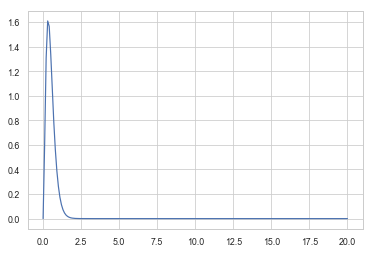

In [16]:
a = 3 # shape 
b = 6 # rate , 1/b is scale 
t = np.linspace(0,20,200)
y = gamma.pdf(t,a= a,scale = 1/b)
plt.plot(t,y)

### graph setting 

In [4]:
plt.rcParams["legend.fontsize"] = 12 
plt.rcParams['font.family'] = 'IPAPGothic' #全体のフォントを設定
plt.rcParams["figure.figsize"] = [8, 5]
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["axes.labelsize"] = 12

# Summing up  

In [22]:
def pr_all(mu=5,sigma =2,bins = 200,beta0 = 50,a = 10,b = 2,PRewards =[0.25,0.35,0.5,0.75,0.9] ):
    t = np.linspace(0,20,bins)
    tau = t[1] - t[0]
    nm = norm(loc = mu,scale = sigma)
    print("mu : ",mu,",sigma : ",sigma)
    print("tau :",t[1] - t[0])
    y = nm.pdf(t)
    yy = 1 - nm.cdf(t)
    beta = beta0*gamma.pdf(t,a= a,scale = 1/b)
    plt.plot(t,beta)
    plt.title("beta")
    plt.show()

    plt.plot(t,y,label="Reward timing, pdf of N($\mu,\sigma$)")
    plt.plot(t,yy,label  ="Likelihood,1 - cdf of N($\mu,\sigma$)")
    plt.xlabel("time")
    plt.ylabel("Likelihood")
    plt.legend()
    plt.title("Fig 7a top")
    plt.show()

    # Fig 7A middle
    for PReward in PRewards:
        PPosterior = PReward*yy/( PReward*yy + 1- PReward )
        plt.plot(t,PPosterior,label=str(PReward))
    plt.ylim([0,1])
    plt.xlabel("time")
    plt.ylabel("Posterior")
    plt.title("Fig 7a middle")
    plt.legend(title="prior prob. for reward")
    plt.show()

    # P(wait|reward)
    for PReward in PRewards:
        PPosterior = PReward*yy/( PReward*yy + 1-PReward  )
        PWait =   1 / (1 + np.exp(-beta*PPosterior))
        plt.plot(t,PWait,label=str(PReward))
    plt.ylim([0,1])
    plt.xlabel("time")
    plt.ylabel("P(wait|t)")
    plt.legend(title="prior prob. for reward")
    plt.title("P(wait|t)")
    plt.show()

    # probability of quitting 
    for PReward in PRewards:
        PPosterior = PReward*yy/( PReward*yy + 1-PReward  )
        PWait =   1 / (1 + np.exp(-beta*PPosterior))
        Pwaitings = [1]
        Pquit = []
        for pw in PWait:
            Pquit.append(Pwaitings[-1]*(1-pw))
            Pwaitings.append(Pwaitings[-1]*pw)
        plt.plot(t,Pquit,label=str(PReward))

    plt.xlabel("time")
    plt.ylabel("wait time distribution of quit")
    plt.legend(title="prior prob. for reward")
    plt.title("Fig 7a bottom. Waiting, Prob. of quit")
    plt.show()


## change this parameter can show different results
tau is almost equivalent to 20/bins 

mu :  5 ,sigma :  2
tau : 0.10050251256281408


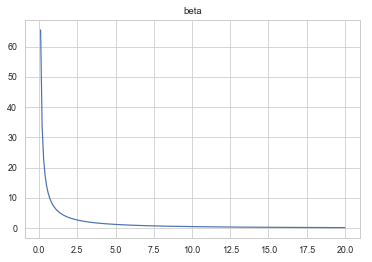

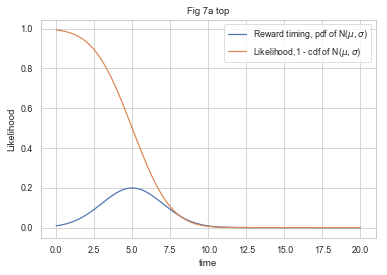

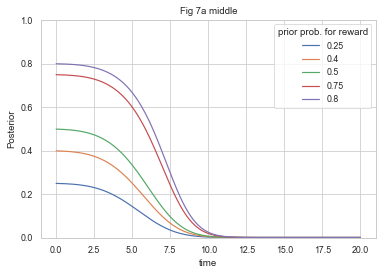

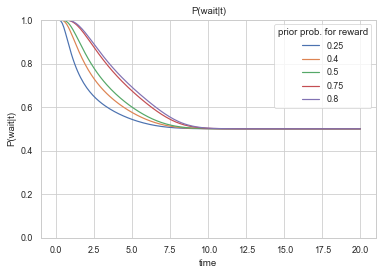

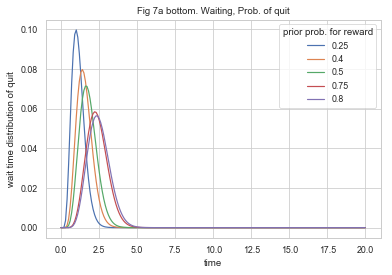

In [35]:
# tau is given by akmost 20/bins 
pr_all(mu=5,sigma=2,bins=200,a = 0.04,b=0.05,beta0=200,PRewards=[0.25,0.4,0.5,0.75,0.8] )


#  change setting, beta-> constant, norm -> gamma

In [51]:
def pr_all(bins = 200,beta = 50,a = 10,b = 2,PRewards =[0.25,0.35,0.5,0.75,0.9] ):
    t = np.linspace(0,20,bins)
    tau = t[1] - t[0]
    gm = gamma(a=  a,scale = 1/b)
    print("shape(a) : ",a,",rate(b) : ",b)
    print("tau :",t[1] - t[0])
    y = gm.pdf(t)
    yy = 1 - gm.cdf(t)


    plt.plot(t,y,label="Reward timing, pdf of N($\mu,\sigma$)")
    plt.plot(t,yy,label  ="Likelihood,1 - cdf of N($\mu,\sigma$)")
    plt.xlabel("time")
    plt.ylabel("Likelihood")
    plt.legend()
    plt.title("Fig 7a top")
    plt.show()

    # Fig 7A middle
    for PReward in PRewards:
        PPosterior = PReward*yy/( PReward*yy + 1- PReward )
        plt.plot(t,PPosterior,label=str(PReward))
    plt.ylim([0,1])
    plt.xlabel("time")
    plt.ylabel("Posterior")
    plt.title("Fig 7a middle")
    plt.legend(title="prior prob. for reward")
    plt.show()

    # P(wait|reward)
    for PReward in PRewards:
        PPosterior = PReward*yy/( PReward*yy + 1-PReward  )
        PWait =   1 / (1 + np.exp(-beta*PPosterior))
        plt.plot(t,PWait,label=str(PReward))
    plt.ylim([0,1])
    plt.xlabel("time")
    plt.ylabel("P(wait|t)")
    plt.legend(title="prior prob. for reward")
    plt.title("P(wait|t)")
    plt.show()

    # probability of quitting 
    for PReward in PRewards:
        PPosterior = PReward*yy/( PReward*yy + 1-PReward  )
        PWait =   1 / (1 + np.exp(-beta*PPosterior))
        Pwaitings = [1]
        Pquit = []
        for pw in PWait:
            Pquit.append(Pwaitings[-1]*(1-pw))
            Pwaitings.append(Pwaitings[-1]*pw)
        plt.plot(t,Pquit,label=str(PReward))

    plt.xlabel("time")
    plt.ylabel("wait time distribution of quit")
    plt.legend(title="prior prob. for reward")
    plt.title("Fig 7a bottom. Waiting, Prob. of quit")
    plt.show()


## change this parameter can show different results
tau is almost equivalent to 20/bins 

shape(a) :  1 ,rate(b) :  0.2
tau : 0.10050251256281408


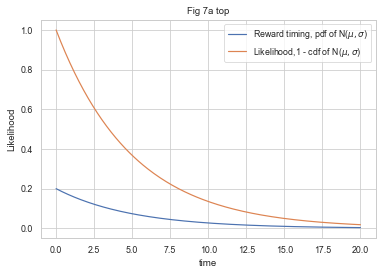

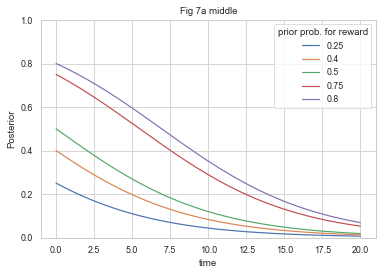

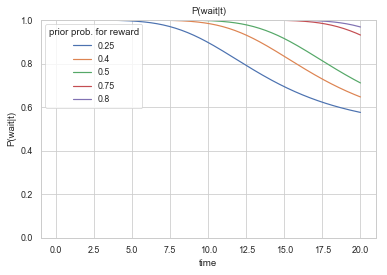

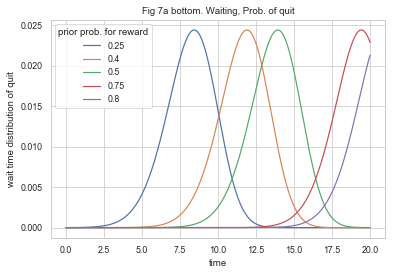

In [50]:
# tau is given by akmost 20/bins 
pr_all(bins=200,a = 1,b=0.2,beta=50,PRewards=[0.25,0.4,0.5,0.75,0.8] )
